# Web scraping with Python

Lino Galiana  
2024-09-23

<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Version 🇫🇷</h3>
This is the French version 🇫🇷 of that chapter,to see the English version go <a href="https://pythonds.linogaliana.fr/content/manipulation/04a_webscraping_TP.html">there</a>
</div>

[*Web scraping*](https://en.wikipedia.org/wiki/Web_scraping) refers to techniques for extracting content from websites.
It is a very useful practice for anyone looking to work with information available online, but not necessarily in the form of an *Excel* table.

This chapter introduces you to how to create and run bots to quickly retrieve useful information for your current or future projects.
It starts with some concrete use cases.
This chapter is heavily inspired and adapted from [Xavier Dupré’s](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/TD2A_Eco_Web_Scraping.html) work, the former professor of the subject.

# 1. Issues

A number of issues related to *web scraping* will only be briefly mentioned in this chapter.

## 1.1 The Legal Gray Area of *Web Scraping*

First, regarding the legality of retrieving information through *scraping*, there is a gray area. Just because information is available on the internet, either directly or with a little searching, does not mean it can be retrieved and reused.

The excellent [course by Antoine Palazzolo](https://inseefrlab.github.io/formation-webscraping/) discusses several media and legal cases on this issue. In France, the CNIL published new guidelines in 2020 on *web scraping*, clarifying that any data cannot be reused without the knowledge of the person to whom the data belongs. In other words, in principle, data collected by *web scraping* is subject to GDPR, meaning it requires the consent of the individuals from whom the data is reused.

It is therefore recommended to **be cautious with the data retrieved** by *web scraping* to avoid legal issues.

## 1.2 Stability and Reliability of Retrieved Information

Data retrieval through *web scraping* is certainly practical, but it does not necessarily align with the intended or desired use by a data provider. Since data is costly to collect and make available, some sites may not necessarily want it to be extracted freely and easily. Especially when the data could provide a competitor with commercially useful information (e.g., the price of a competing product).

As a result, companies often implement strategies to block or limit the amount of data scraped. The most common method is detecting and blocking requests made by bots rather than humans. For specialized entities, this detection is quite easy because numerous indicators can identify whether a website visit comes from a human user behind a browser or a bot. To mention just a few clues: browsing speed between pages, speed of data extraction, fingerprinting of the browser used, ability to answer random questions (captcha)…

The best practices mentioned later aim to ensure that a bot behaves civilly by adopting behavior close to that of a human without pretending to be one.

It’s also essential to be cautious about the information received through *web scraping*. Since data is central to some business models, some companies don’t hesitate to send false data to bots rather than blocking them. It’s fair play! Another trap technique is called the *honey pot*. These are pages that a human would never visit—for example, because they don’t appear in the graphical interface—but where a bot, automatically searching for content, might get stuck.

Without resorting to the strategy of blocking *web scraping*, other reasons can explain why a data retrieval that worked in the past may no longer work. The most frequent reason is a change in the structure of a website. *Web scraping* has the disadvantage of retrieving information from a very hierarchical structure. A change in this structure can make a bot incapable of retrieving content. Moreover, to remain attractive, websites frequently change, which can easily render a bot inoperative.

In general, one of the key takeaways from this chapter is that **web scraping is a last resort solution for occasional data retrieval without any guarantee of future functionality**. It is preferable to **favor APIs when they are available**. The latter resemble a contract (formal or not) between a data provider and a user, where needs (the data) and access conditions (number of requests, volume, authentication…) are defined, whereas *web scraping* is more akin to behavior in the *Wild West*.

## 1.3 Best Practices

The ability to retrieve data through a bot does not mean one can afford to be uncivilized. Indeed, when uncontrolled, *web scraping* can resemble a classic cyberattack aimed at taking down a website: a denial of service. The [course by Antoine Palazzolo](https://inseefrlab.github.io/formation-webscraping/) reviews some best practices that have emerged in the scraping community. It is recommended to read this resource to learn more about this topic. Several conventions are discussed, including:

-   Navigate from the site’s root to the `robots.txt` file to check the guidelines provided by the website’s developers to regulate the behavior of bots;
-   Space out each request by several seconds, as a human would, to avoid overloading the website and causing it to crash due to a denial of service;
-   Make requests during the website’s off-peak hours if it is not an internationally accessed site. For example, for a French-language site, running the bot during the night in metropolitan France is a good practice. To run a bot from `Python` at a pre-scheduled time, there are `cronjobs`.

# 2. A Detour to the Web: How Does a Website Work?

Even though this lab doesn’t aim to provide a web course, you still need some basics on how a website works to understand how information is structured on a page.

A website is a collection of pages coded in *HTML* that describe both the content and the layout of a *Web* page.

To see this, open any web page and right-click on it.

-   On `Chrome` <i class="fab fa-chrome"></i>: Then click on *“View page source”* (<kbd>CTRL</kbd>+<kbd>U</kbd>);
-   On `Firefox` <i class="fab fa-firefox"></i>: *“View Page Source”* (<kbd>CTRL</kbd>+<kbd>SHIFT</kbd>+<kbd>K</kbd>);
-   On `Edge` <i class="fab fa-edge"></i>: *“View page source”* (<kbd>CTRL</kbd>+<kbd>U</kbd>);
-   On `Safari` <i class="fab fa-safari"></i>: see how to do it [here](https://www.wikihow.com/View-Source-Code).

If you know which element interests you, you can also open the browser’s inspector (right-click on the element + “Inspect”) to display the tags surrounding your element more ergonomically, like a zoom.

## 2.1 Tags

On a web page, you will always find elements like `<head>`, `<title>`, etc. These are the codes that allow you to structure the content of an *HTML* page and are called **tags**.
For example, tags include `<p>`, `<h1>`, `<h2>`, `<h3>`, `<strong>`, or `<em>`.
The symbol `< >` is a tag: it indicates the beginning of a section. The symbol `</ >` indicates the end of that section. Most tags come in pairs, with an *opening tag* and a *closing tag* (e.g., `<p>` and `</p>`).

For example, the main tags defining the structure of a table are as follows:

| Tag         | Description          |
|-------------|----------------------|
| `<table>`   | Table                |
| `<caption>` | Table title          |
| `<tr>`      | Table row            |
| `<th>`      | Header cell          |
| `<td>`      | Cell                 |
| `<thead>`   | Table header section |
| `<tbody>`   | Table body section   |
| `<tfoot>`   | Table footer section |

### 2.1.1 Application: A Table in HTML

The `HTML` code for the following table:

``` {html}
<table>
<caption> Le Titre de mon tableau </caption>

   <tr>
      <th>Prénom</th>
      <th>Nom</th>
      <th>Profession</th>
   </tr>
   <tr>
      <td>Mike </td>
      <td>Stuntman</td>
      <td>Cascadeur</td>
   </tr>
   <tr>
      <td>Mister</td>
      <td>Pink</td>
      <td>Gangster</td>
   </tr>
</table>
```

Donnera dans le navigateur :

|        |          |            |
|--------|----------|------------|
| Prénom | Nom      | Profession |
| Mike   | Stuntman | Cascadeur  |
| Mister | Pink     | Gangster   |

Le Titre de mon tableau

### 2.1.2 Parent and Child

In the context of HTML language, the terms parent (*parent*) and child (*child*) are used to refer to elements nested within each other. In the following construction, for example:

``` html
<div> 
    <p>
       bla,bla
    </p>
</div>
```

On the web page, it will appear as follows:

<div> 
    <p>
       bla,bla
    </p>
</div>

One would say that the `<div>` element is the parent of the `<p>` element, while the `<p>` element is the child of the `<div>` element.

> *But why learn this for “scraping”?*

Because to effectively retrieve information from a website, you need to understand its structure and, therefore, its HTML code. The `Python` functions used for *scraping* are primarily designed to help you navigate between tags.
With `Python`, you will essentially replicate your manual search behavior to automate it.

# 3. Scraping with `Python`: The `BeautifulSoup` Package

## 3.1 Available Packages

In the first part of this chapter,
we will primarily use the [`BeautifulSoup4`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) package,
in conjunction with [`requests`](https://requests.readthedocs.io/en/latest/). The latter package allow you to retrieve the raw text
of a page, which will then be inspected via [`BeautifulSoup4`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

`BeautifulSoup` will suffice when you want to work on static HTML pages. As soon as the information you are looking for is generated via the execution of [JavaScript](https://en.wikipedia.org/wiki/JavaScript) scripts, you will need to use tools like [Selenium](https://selenium-python.readthedocs.io/).

Similarly, if you don’t know the URL, you’ll need to use a framework like [Scrapy](https://scrapy.org/), which easily navigates from one page to another. This technique is called *“web crawling”*. `Scrapy` is more complex to handle than `BeautifulSoup`: if you want more details, visit the [Scrapy tutorial page](https://doc.scrapy.org/en/latest/intro/tutorial.html).

*Web scraping* is an area where reproducibility is difficult to implement.
A *web* page may evolve
regularly, and from one web page to another, the structure can be very different, making some code difficult to export.
Therefore, the best way to have a functional program is
to understand the structure of a web page and distinguish the elements that can be exported
to other use cases from *ad hoc* requests.

In [1]:
!pip install -q lxml
!pip install bs4

<div class="alert alert-info" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-comment"></i> Note</h3>

To be able to use `Selenium`, it is necessary
to make `Python` communicate with a web browser (Firefox or Chromium).
The `webdriver-manager` package allows `Python` to know where
this browser is located if it is already installed in a standard path.
To install it, the code in the cell below can be used.

</div>

To run `Selenium`, you need to use a package
called `webdriver-manager`. So, we’ll install it, along with `selenium`:

In [2]:
!pip install selenium
!pip install webdriver-manager

## 3.2 Retrieve the Content of an HTML Page

Let’s start slowly. Let’s take a Wikipedia page,
for example, the one for the 2019-2020 Ligue 1 football season: [2019-2020 Championnat de France de football](https://en.wikipedia.org/wiki/2019%E2%80%9320_Ligue_1). We will want to retrieve the list of teams, as well as the URLs of the Wikipedia pages for these teams.

Step 1️⃣: Connect to the Wikipedia page and obtain the source code.
For this, the simplest way is to use the `requests` package.
This allows `Python` to make the appropriate HTTP request to obtain the content of a page from its URL:

In [4]:
import requests

url_ligue_1 = (
    "https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020"
)

request_text = requests.get(url_ligue_1).content


In [5]:
request_text


b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="fr" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Championnat de France de football 2019-2020 \xe2\x80\x94 Wikip\xc3\xa9dia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabl

Step 2️⃣: search this abundant source code for the tags that will extract the information we’re interested in. The main interest of the `BeautifulSoup` package is to offer easy-to-use methods for searching complex texts for strings of characters from HTML or XML tags.

In [6]:
import bs4

page = bs4.BeautifulSoup(request_text, "lxml")


If we *print* the `page` object created with `BeautifulSoup`,
we see that it is no longer a string but an actual HTML page with tags.
We can now search for elements within these tags.

## 3.3 The `find` method

As a first illustration of the power of `BeautifulSoup`, we want to know the title of the page. To do this, we use the `.find` method and ask it *“title”*.

In [9]:
print(page.find("title"))


<title>Championnat de France de football 2019-2020 — Wikipédia</title>

The `.find` method only returns the first occurrence of the element.

To verify this, you can:

-   copy the snippet of source code obtained when you search for a `table`,
-   paste it into a cell in your notebook,
-   and switch the cell to *“Markdown”*.

The cell with the copied source code gives:

In [10]:
print(page.find("table"))


<table><caption style="background-color:#99cc99;color:#000000;">Généralités</caption><tbody><tr>
<th scope="row" style="width:10.5em;">Sport</th>
<td>
<a href="/wiki/Football" title="Football">Football</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Organisateur(s)</th>
<td>
<a href="/wiki/Ligue_de_football_professionnel_(France)" title="Ligue de football professionnel (France)">LFP</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Édition</th>
<td>
<abbr class="abbr" title="Quatre-vingt-deuxième (huitante-deuxième / octante-deuxième)">82<sup>e</sup></abbr></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Lieu(x)</th>
<td>
<span class="datasortkey" data-sort-value="France"><span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau de la France"><img alt="Drapeau de la France" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async

which is the source text that generates the following table:

<table>

<caption style="background-color:#99cc99;color:#000000;">

Généralités

</caption>

<tbody>

<tr>

<th scope="row" style="width:10.5em;">

Sport

</th>

<td>

<a href="/wiki/Football" title="Football">Football</a>

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Organisateur(s)

</th>

<td>

<a href="/wiki/Ligue_de_football_professionnel_(France)" title="Ligue de football professionnel (France)">LFP</a>

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Édition

</th>

<td>

<abbr class="abbr" title="Quatre-vingt-deuxième (huitante-deuxième / octante-deuxième)">82<sup>e</sup></abbr>

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Lieu(x)

</th>

<td>

<span class="datasortkey" data-sort-value="France"><span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau de la France"><img alt="Drapeau de la France" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> </span><a href="/wiki/France" title="France">France</a></span> et <br/><span class="datasortkey" data-sort-value="Monaco"><span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_Monaco.svg" title="Drapeau de Monaco"><img alt="Drapeau de Monaco" class="mw-file-element" data-file-height="800" data-file-width="1000" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/20px-Flag_of_Monaco.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/30px-Flag_of_Monaco.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/40px-Flag_of_Monaco.svg.png 2x" width="20"/></a></span> </span><a href="/wiki/Monaco" title="Monaco">Monaco</a></span>

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Date

</th>

<td>

Du <time class="nowrap date-lien" data-sort-value="2019-08-09" datetime="2019-08-09"><a href="/wiki/9_ao%C3%BBt_en_sport" title="9 août en sport">9</a> <a class="mw-redirect" href="/wiki/Ao%C3%BBt_2019_en_sport" title="Août 2019 en sport">août</a> <a href="/wiki/2019_en_football" title="2019 en football">2019</a></time><br/>au <time class="nowrap date-lien" data-sort-value="2020-03-08" datetime="2020-03-08"><a href="/wiki/8_mars_en_sport" title="8 mars en sport">8 mars</a> <a href="/wiki/2020_en_football" title="2020 en football">2020</a></time> <small>(arrêt définitif)</small>

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Participants

</th>

<td>

20 équipes

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Matchs joués

</th>

<td>

279 (sur 380 prévus)

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Site web officiel

</th>

<td>

<cite class="ouvrage" id="site_officiel" style="font-style: normal;"><a class="external text" href="https://www.ligue1.fr/" rel="nofollow">Site officiel</a></cite>

</td>

</tr>

</tbody>

</table>

## 3.4 The `findAll` Method

To find all occurrences, use `.findAll()`.

In [12]:
print(
    "Il y a", len(page.findAll("table")), "éléments dans la page qui sont des <table>"
)


Il y a 34 éléments dans la page qui sont des <table>

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-lightbulb"></i> Tip</h3>

`Python` is not the only language that allows you to retrieve elements from a web page. This is one of the main objectives of `Javascript`, which is accessible through any web browser.

For example, to draw a parallel with `page.find('title')` that we used in `Python`, you can open the [previously mentioned page](https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020) with your browser. After opening the browser’s developer tools (<kbd>CTRL</kbd>+<kbd>SHIFT</kbd>+<kbd>K</kbd> on `Firefox`), you can type `document.querySelector("title")` in the console to get the content of the HTML node you are looking for:

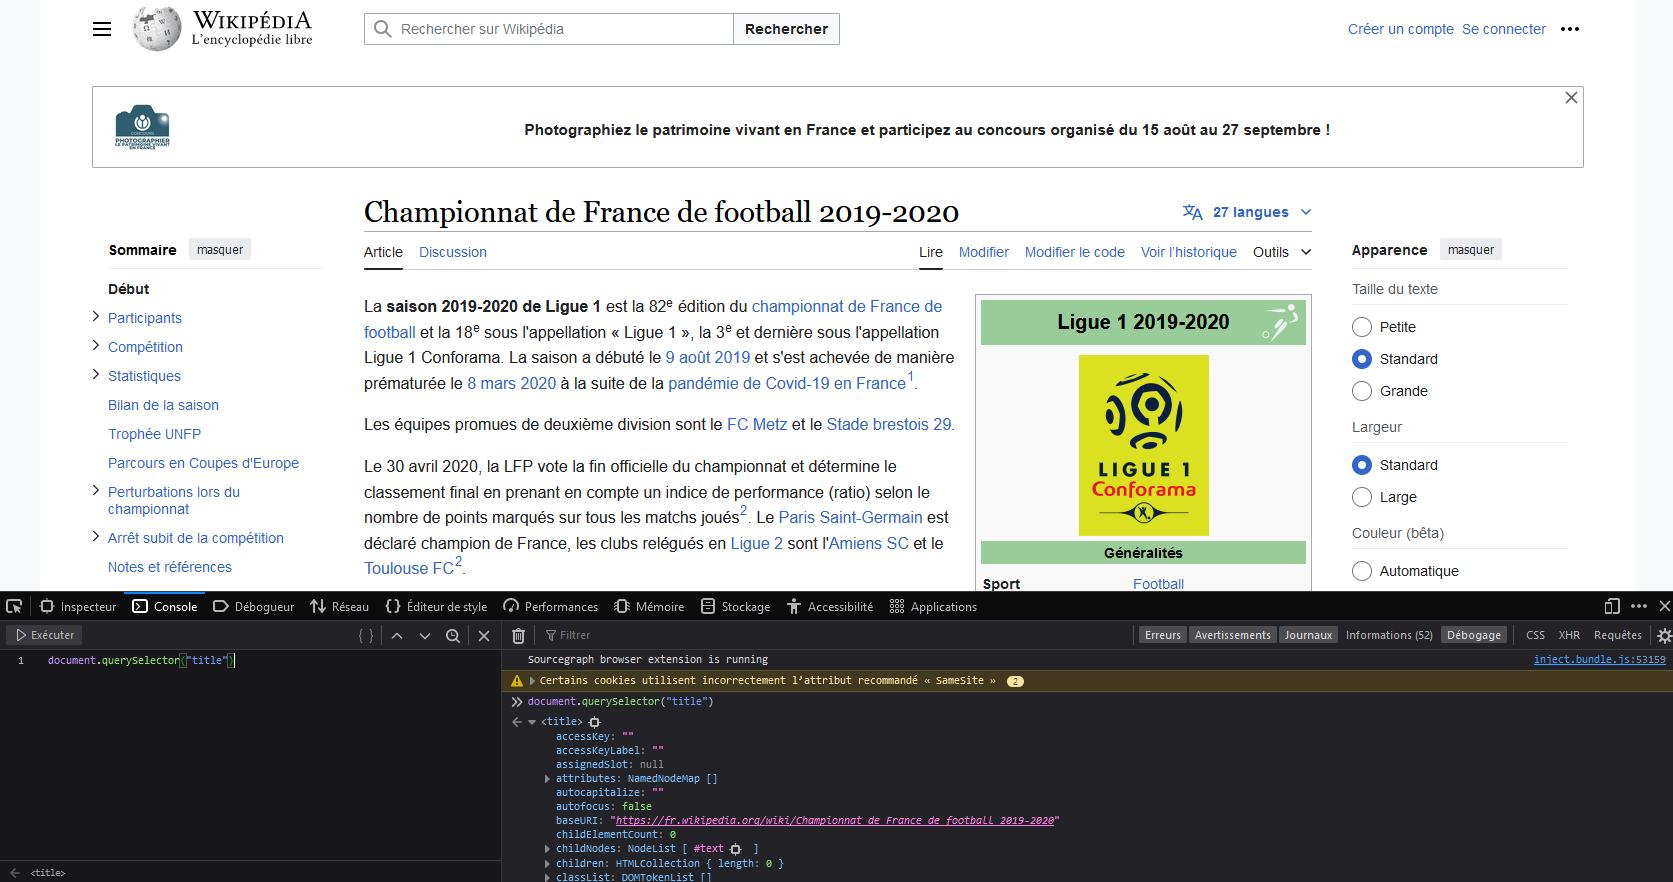

If you use `Selenium` for web scraping, you will actually encounter these `Javascript` verbs in any method you use.

Understanding the structure of a page and its interaction with the browser is extremely useful when doing *scraping*, even when the site is purely static, meaning it does not have elements reacting to user actions on the web browser.

</div>

# 4. Guided Exercise: Get the List of Ligue 1 Teams

In the first paragraph of the *“Participants”* page,
there is a table with the results of the year.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 1: Retrieve the Participants of Ligue 1</h3>

To do this, we will proceed in 6 steps:

1.  Find the table
2.  Retrieve each row from the table
3.  Clean up the outputs by keeping only the text in a row
4.  Generalize for all rows
5.  Retrieve the table headers
6.  Finalize the table

</div>

1️⃣ Find the table

In [13]:
# on identifie le tableau en question : c'est le premier qui a cette classe "wikitable sortable"
tableau_participants = page.find("table", {"class": "wikitable sortable"})


``` python
print(tableau_participants)
```

Club

Dernière<br/>montée

Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">\[</span>3<span class="cite_crochet">\]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>

Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>

Entraîneur

Depuis

Stade

Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">\[</span>4<span class="cite_crochet">\]</span></a></sup>

Nombre<br/>de saisons<br/>en L1

<a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a>

1974

637

<span data-sort-value="101 !"></span><abbr class="abbr" title="Premier">1<sup>er</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_Germany.svg" title="Drapeau : Allemagne"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="1000" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/20px-Flag_of_Germany.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/30px-Flag_of_Germany.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/40px-Flag_of_Germany.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Thomas_Tuchel" title="Thomas Tuchel">Thomas Tuchel</a>

2018

<a href="/wiki/Parc_des_Princes" title="Parc des Princes">Parc des Princes</a>

47 929

46

<a href="/wiki/LOSC_Lille" title="LOSC Lille">LOSC Lille</a>

2000

120

<span data-sort-value="102 !"></span><abbr class="abbr" title="Deuxième">2<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Christophe_Galtier" title="Christophe Galtier">Christophe Galtier</a>

2017

<a href="/wiki/Stade_Pierre-Mauroy" title="Stade Pierre-Mauroy">Stade Pierre-Mauroy</a>

49 712

59

<a href="/wiki/Olympique_lyonnais" title="Olympique lyonnais">Olympique lyonnais</a>

1989

310

<span data-sort-value="103 !"></span><abbr class="abbr" title="Troisième">3<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Rudi_Garcia" title="Rudi Garcia">Rudi Garcia</a>

2019

<a href="/wiki/Parc_Olympique_lyonnais" title="Parc Olympique lyonnais">Groupama Stadium</a>

57 206

60

<a href="/wiki/Association_sportive_de_Saint-%C3%89tienne" title="Association sportive de Saint-Étienne">AS Saint-Étienne</a>

2004

100

<span data-sort-value="104 !"></span><abbr class="abbr" title="Quatrième">4<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Claude_Puel" title="Claude Puel">Claude Puel</a>

2019

<a href="/wiki/Stade_Geoffroy-Guichard" title="Stade Geoffroy-Guichard">Stade Geoffroy-Guichard</a>

41 965

66

<a href="/wiki/Olympique_de_Marseille" title="Olympique de Marseille">Olympique de Marseille</a>

1996

110

<span data-sort-value="105 !"></span><abbr class="abbr" title="Cinquième">5<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_Portugal.svg" title="Drapeau : Portugal"><img alt="" class="mw-file-element" data-file-height="400" data-file-width="600" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/20px-Flag_of_Portugal.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/30px-Flag_of_Portugal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/40px-Flag_of_Portugal.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Andr%C3%A9_Villas-Boas" title="André Villas-Boas">André Villas-Boas</a>

2019

<a href="/wiki/Stade_V%C3%A9lodrome" title="Stade Vélodrome">Orange Vélodrome</a>

66 226

69

<a href="/wiki/Montpellier_H%C3%A9rault_Sport_Club" title="Montpellier Hérault Sport Club">Montpellier HSC</a>

2009

40

<span data-sort-value="106 !"></span><abbr class="abbr" title="Sixième">6<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_Armenia.svg" title="Drapeau : Arménie"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="1200" decoding="async" height="10" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/20px-Flag_of_Armenia.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/30px-Flag_of_Armenia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/40px-Flag_of_Armenia.svg.png 2x" width="20"/></a></span></span><span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Michel_Der_Zakarian" title="Michel Der Zakarian">Michel Der Zakarian</a>

2017

<a href="/wiki/Stade_de_la_Mosson" title="Stade de la Mosson">Stade de la Mosson</a>

22 000

27

<a class="mw-redirect" href="/wiki/Olympique_Gymnaste_Club_Nice" title="Olympique Gymnaste Club Nice">OGC Nice</a>

2002

50

<span data-sort-value="107 !"></span><abbr class="abbr" title="Septième">7<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Patrick_Vieira" title="Patrick Vieira">Patrick Vieira</a>

2018

<a href="/wiki/Allianz_Riviera" title="Allianz Riviera">Allianz Riviera</a>

35 596

60

<a href="/wiki/Stade_de_Reims" title="Stade de Reims">Stade de Reims</a>

2018

45

<span data-sort-value="108 !"></span><abbr class="abbr" title="Huitième">8<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/David_Guion" title="David Guion">David Guion</a>

2017

<a href="/wiki/Stade_Auguste-Delaune" title="Stade Auguste-Delaune">Stade Auguste-Delaune</a>

20 546

35

<a href="/wiki/N%C3%AEmes_Olympique" title="Nîmes Olympique">Nîmes Olympique</a>

2018

27

<span data-sort-value="109 !"></span><abbr class="abbr" title="Neuvième">9<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Bernard_Blaquart" title="Bernard Blaquart">Bernard Blaquart</a>

2015

<a href="/wiki/Stade_des_Costi%C3%A8res" title="Stade des Costières">Stade des Costières</a>

15 788

35

<a class="mw-redirect" href="/wiki/Stade_rennais_football_club" title="Stade rennais football club">Stade rennais FC</a>

1994

65

<span data-sort-value="110 !"></span><abbr class="abbr" title="Dixième">10<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Julien_St%C3%A9phan" title="Julien Stéphan">Julien Stéphan</a>

2018

<a href="/wiki/Roazhon_Park" title="Roazhon Park">Roazhon Park</a>

29 194

62

<a href="/wiki/Racing_Club_de_Strasbourg_Alsace" title="Racing Club de Strasbourg Alsace">RC Strasbourg Alsace</a>

2017

43

<span data-sort-value="111 !"></span><abbr class="abbr" title="Onzième">11<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Thierry_Laurey" title="Thierry Laurey">Thierry Laurey</a>

2016

<a href="/wiki/Stade_de_la_Meinau" title="Stade de la Meinau">Stade de la Meinau</a>

26 109

58

<a href="/wiki/Football_Club_de_Nantes" title="Football Club de Nantes">FC Nantes</a>

2013

70

<span data-sort-value="112 !"></span><abbr class="abbr" title="Douzième">12<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Christian_Gourcuff" title="Christian Gourcuff">Christian Gourcuff</a>

2019

<a href="/wiki/Stade_de_la_Beaujoire" title="Stade de la Beaujoire">Stade de la Beaujoire - Louis Fonteneau</a>

35 322

51

<a class="mw-redirect" href="/wiki/Angers_sporting_club_de_l%27Ouest" title="Angers sporting club de l'Ouest">SCO d’Angers</a>

2015

32

<span data-sort-value="113 !"></span><abbr class="abbr" title="Treizième">13<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/St%C3%A9phane_Moulin_(football)" title="Stéphane Moulin (football)">Stéphane Moulin</a>

2011

<a href="/wiki/Stade_Raymond-Kopa" title="Stade Raymond-Kopa">Stade Raymond-Kopa</a>

14 582

27

<a href="/wiki/Football_Club_des_Girondins_de_Bordeaux" title="Football Club des Girondins de Bordeaux">Girondins de Bordeaux</a>

1992

70

<span data-sort-value="114 !"></span><abbr class="abbr" title="Quatorzième">14<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_Portugal.svg" title="Drapeau : Portugal"><img alt="" class="mw-file-element" data-file-height="400" data-file-width="600" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/20px-Flag_of_Portugal.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/30px-Flag_of_Portugal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/40px-Flag_of_Portugal.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Paulo_Sousa_(football,_1970)" title="Paulo Sousa (football, 1970)">Paulo Sousa</a>

2019

<a href="/wiki/Matmut_Atlantique" title="Matmut Atlantique">Matmut Atlantique</a>

42 115

66

<a href="/wiki/Amiens_Sporting_Club" title="Amiens Sporting Club">Amiens SC</a>

2017

30

<span data-sort-value="115 !"></span><abbr class="abbr" title="Quinzième">15<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_Slovenia.svg" title="Drapeau : Slovénie"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="1200" decoding="async" height="10" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/20px-Flag_of_Slovenia.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/30px-Flag_of_Slovenia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/40px-Flag_of_Slovenia.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Luka_Elsner" title="Luka Elsner">Luka Elsner</a>

2019

<a href="/wiki/Stade_de_la_Licorne" title="Stade de la Licorne">Stade Crédit Agricole la Licorne</a>

12 999

2

<a href="/wiki/Toulouse_Football_Club" title="Toulouse Football Club">Toulouse FC</a>

2003

35

<span data-sort-value="116 !"></span><abbr class="abbr" title="Seizième">16<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Denis_Zanko" title="Denis Zanko">Denis Zanko</a>

2020

<a href="/wiki/Stadium_de_Toulouse" title="Stadium de Toulouse">Stadium de Toulouse</a>

33 033

32

<a class="mw-redirect" href="/wiki/Association_sportive_de_Monaco_football_club" title="Association sportive de Monaco football club">AS Monaco</a>

2013

220

<span data-sort-value="117 !"></span><abbr class="abbr" title="Dix-septième">17<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_Spain.svg" title="Drapeau : Espagne"><img alt="" class="mw-file-element" data-file-height="500" data-file-width="750" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/20px-Flag_of_Spain.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/30px-Flag_of_Spain.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/40px-Flag_of_Spain.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Robert_Moreno" title="Robert Moreno">Robert Moreno</a>

2019

<a href="/wiki/Stade_Louis-II" title="Stade Louis-II">Stade Louis-II</a>

16 500

60

<a href="/wiki/Dijon_Football_C%C3%B4te-d%27Or" title="Dijon Football Côte-d'Or">Dijon FCO</a>

2016

38

<span data-sort-value="118 !"></span><abbr class="abbr" title="Dix-huitième">18<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/St%C3%A9phane_Jobard" title="Stéphane Jobard">Stéphane Jobard</a>

2019

<a href="/wiki/Stade_Gaston-G%C3%A9rard" title="Stade Gaston-Gérard">Parc des Sports Gaston-Gérard</a>

15 459

4

<a href="/wiki/Football_Club_de_Metz" title="Football Club de Metz">FC Metz</a>

2019

40

<span data-sort-value="201 !"></span><abbr class="abbr" title="Premier">1<sup>er</sup></abbr> (<a class="mw-redirect" href="/wiki/Championnat_de_France_de_football_de_Ligue_2_2018-2019" title="Championnat de France de football de Ligue 2 2018-2019">Ligue 2</a>)

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Vincent_Hognon" title="Vincent Hognon">Vincent Hognon</a>

2019

<a href="/wiki/Stade_Saint-Symphorien" title="Stade Saint-Symphorien">Stade Saint-Symphorien</a>

25 865

61

<a href="/wiki/Stade_brestois_29" title="Stade brestois 29">Stade brestois 29</a>

2019

30

<span data-sort-value="202 !"></span><abbr class="abbr" title="Deuxième">2<sup>e</sup></abbr> (<a class="mw-redirect" href="/wiki/Championnat_de_France_de_football_de_Ligue_2_2018-2019" title="Championnat de France de football de Ligue 2 2018-2019">Ligue 2</a>)

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Olivier_Dall%27Oglio" title="Olivier Dall'Oglio">Olivier Dall’Oglio</a>

2019

<a href="/wiki/Stade_Francis-Le_Bl%C3%A9" title="Stade Francis-Le Blé">Stade Francis-Le Blé</a>

14 920

13

2️⃣ Retrieve each row from the table

Let’s first search for the rows where `tr` tag appears

In [15]:
table_body = tableau_participants.find("tbody")
rows = table_body.find_all("tr")


You get a list where each element is one of the rows in the table.
To illustrate this, we will first display the first row.
This corresponds to the column headers:

In [16]:
print(rows[0])


<tr>
<th scope="col">Club
</th>
<th scope="col">Dernière<br/>montée
</th>
<th scope="col">Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">[</span>3<span class="cite_crochet">]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>
</th>
<th scope="col">Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>
</th>
<th scope="col">Entraîneur
</th>
<th scope="col">Depuis
</th>
<th scope="col">Stade
</th>
<th scope="col">Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">[</span>4<span class="cite_crochet">]</span></a></sup>
</th>
<th scope="col">Nombre<br/>de saisons<br/>en L1
</th></tr>

The second row will correspond to the row of the first club listed in the table:

In [17]:
print(rows[1])


<tr bgcolor="#97DEFF">
<td><a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a>
</td>
<td>1974
</td>
<td>637
</td>
<td><span data-sort-value="101 !"></span><abbr class="abbr" title="Premier">1<sup>er</sup></abbr>
</td>
<td align="left"><span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_Germany.svg" title="Drapeau : Allemagne"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="1000" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/20px-Flag_of_Germany.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/30px-Flag_of_Germany.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/40px-Flag_of_Germany.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Thomas_Tuchel" title="Thomas Tuchel">T

3️⃣ Clean the outputs by keeping only the text in a row

We will use the `text` attribute to strip away all the HTML layer we obtained in step 2.

An example on the first club’s row:
- We start by taking all the cells in that row, using the `td` tag.
- Then, we loop through each cell and keep only the text from the cell using the `text` attribute.
- Finally, we apply the `strip()` method to ensure the text is properly formatted (no unnecessary spaces, etc.).

In [18]:
cols = rows[1].find_all("td")
print(cols[0])
print(cols[0].text.strip())


<td><a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a>
</td>
Paris Saint-Germain

In [19]:
for ele in cols:
    print(ele.text.strip())


Paris Saint-Germain
1974
637
1er
Thomas Tuchel
2018
Parc des Princes
47 929
46

4️⃣ Generalize for all rows:

In [20]:
for row in rows:
    cols = row.find_all("td")
    cols = [ele.text.strip() for ele in cols]
    print(cols)


[]
['Paris Saint-Germain', '1974', '637', '1er', 'Thomas Tuchel', '2018', 'Parc des Princes', '47\xa0929', '46']
['LOSC Lille', '2000', '120', '2e', 'Christophe Galtier', '2017', 'Stade Pierre-Mauroy', '49\xa0712', '59']
['Olympique lyonnais', '1989', '310', '3e', 'Rudi Garcia', '2019', 'Groupama Stadium', '57\xa0206', '60']
['AS Saint-Étienne', '2004', '100', '4e', 'Claude Puel', '2019', 'Stade Geoffroy-Guichard', '41\xa0965', '66']
['Olympique de Marseille', '1996', '110', '5e', 'André Villas-Boas', '2019', 'Orange Vélodrome', '66\xa0226', '69']
['Montpellier HSC', '2009', '40', '6e', 'Michel Der Zakarian', '2017', 'Stade de la Mosson', '22\xa0000', '27']
['OGC Nice', '2002', '50', '7e', 'Patrick Vieira', '2018', 'Allianz Riviera', '35\xa0596', '60']
['Stade de Reims', '2018', '45', '8e', 'David Guion', '2017', 'Stade Auguste-Delaune', '20\xa0546', '35']
['Nîmes Olympique', '2018', '27', '9e', 'Bernard Blaquart', '2015', 'Stade des Costières', '15\xa0788', '35']
['Stade rennais FC', 

We have successfully retrieved the information contained in the participants’ table.
But the first row is strange: it’s an empty list…

These are the headers: they are recognized by the `th` tag, not `td`.

We will put all the content into a dictionary, to later convert it into a pandas DataFrame:

In [21]:
dico_participants = dict()
for row in rows:
    cols = row.find_all("td")
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 0:
        dico_participants[cols[0]] = cols[1:]
dico_participants


{'Paris Saint-Germain': ['1974',
  '637',
  '1er',
  'Thomas Tuchel',
  '2018',
  'Parc des Princes',
  '47\xa0929',
  '46'],
 'LOSC Lille': ['2000',
  '120',
  '2e',
  'Christophe Galtier',
  '2017',
  'Stade Pierre-Mauroy',
  '49\xa0712',
  '59'],
 'Olympique lyonnais': ['1989',
  '310',
  '3e',
  'Rudi Garcia',
  '2019',
  'Groupama Stadium',
  '57\xa0206',
  '60'],
 'AS Saint-Étienne': ['2004',
  '100',
  '4e',
  'Claude Puel',
  '2019',
  'Stade Geoffroy-Guichard',
  '41\xa0965',
  '66'],
 'Olympique de Marseille': ['1996',
  '110',
  '5e',
  'André Villas-Boas',
  '2019',
  'Orange Vélodrome',
  '66\xa0226',
  '69'],
 'Montpellier HSC': ['2009',
  '40',
  '6e',
  'Michel Der Zakarian',
  '2017',
  'Stade de la Mosson',
  '22\xa0000',
  '27'],
 'OGC Nice': ['2002',
  '50',
  '7e',
  'Patrick Vieira',
  '2018',
  'Allianz Riviera',
  '35\xa0596',
  '60'],
 'Stade de Reims': ['2018',
  '45',
  '8e',
  'David Guion',
  '2017',
  'Stade Auguste-Delaune',
  '20\xa0546',
  '35'],
 'Nîme

In [22]:
import pandas as pd

data_participants = pd.DataFrame.from_dict(dico_participants, orient="index")
data_participants.head()


5️⃣ Retrieve the table headers:

In [23]:
for row in rows:
    cols = row.find_all("th")
    print(cols)
    if len(cols) > 0:
        cols = [ele.get_text(separator=" ").strip().title() for ele in cols]
        columns_participants = cols


[<th scope="col">Club
</th>, <th scope="col">Dernière<br/>montée
</th>, <th scope="col">Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">[</span>3<span class="cite_crochet">]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>
</th>, <th scope="col">Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>
</th>, <th scope="col">Entraîneur
</th>, <th scope="col">Depuis
</th>, <th scope="col">Stade
</th>, <th scope="col">Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">[</span>4<span class="cite_crochet">]</span></a></sup>
</th>, <th scope="col">Nombre<br/>de saisons<br/>en L1
</th>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

In [24]:
columns_participants


['Club',
 'Dernière Montée',
 'Budget [ 3 ] En M €',
 'Classement 2018-2019',
 'Entraîneur',
 'Depuis',
 'Stade',
 'Capacité En L1 [ 4 ]',
 'Nombre De Saisons En L1']

6️⃣ Finalize the table

In [25]:
data_participants.columns = columns_participants[1:]


In [26]:
data_participants.head()


# 5. Going Further

## 5.1 Retrieving stadium Locations

Try to understand step by step what is done in the following steps (retrieving additional information by navigating through the pages of the different clubs).

In [27]:
import requests
import bs4
import pandas as pd


def retrieve_page(url: str) -> bs4.BeautifulSoup:
    """
    Retrieves and parses a webpage using BeautifulSoup.

    Args:
        url (str): The URL of the webpage to retrieve.

    Returns:
        bs4.BeautifulSoup: The parsed HTML content of the page.
    """
    r = requests.get(url)
    page = bs4.BeautifulSoup(r.content, "html.parser")
    return page


def extract_team_name_url(team: bs4.element.Tag) -> dict:
    """
    Extracts the team name and its corresponding Wikipedia URL.

    Args:
        team (bs4.element.Tag): The BeautifulSoup tag containing the team information.

    Returns:
        dict: A dictionary with the team name as the key and the Wikipedia URL as the value, or None if not found.
    """
    try:
        team_url = team.find("a").get("href")
        equipe = team.find("a").get("title")
        url_get_info = f"http://fr.wikipedia.org{team_url}"
        print(f"Retrieving information for {equipe}")
        return {equipe: url_get_info}
    except AttributeError:
        print(f'No <a> tag for "{team}"')
        return None


def explore_team_page(wikipedia_team_url: str) -> bs4.BeautifulSoup:
    """
    Retrieves and parses a team's Wikipedia page.

    Args:
        wikipedia_team_url (str): The URL of the team's Wikipedia page.

    Returns:
        bs4.BeautifulSoup: The parsed HTML content of the team's Wikipedia page.
    """
    r = requests.get(wikipedia_team_url)
    page = bs4.BeautifulSoup(r.content, "html.parser")
    return page


def extract_stadium_info(search_team: bs4.BeautifulSoup) -> tuple:
    """
    Extracts stadium information from a team's Wikipedia page.

    Args:
        search_team (bs4.BeautifulSoup): The parsed HTML content of the team's Wikipedia page.

    Returns:
        tuple: A tuple containing the stadium name, latitude, and longitude, or (None, None, None) if not found.
    """
    for stadium in search_team.findAll("tr"):
        try:
            header = stadium.find("th", {"scope": "row"})
            if header and header.contents[0].string == "Stade":
                name_stadium, url_get_stade = extract_stadium_name_url(stadium)
                if name_stadium and url_get_stade:
                    latitude, longitude = extract_stadium_coordinates(url_get_stade)
                    return name_stadium, latitude, longitude
        except (AttributeError, IndexError) as e:
            print(f"Error processing stadium information: {e}")
    return None, None, None


def extract_stadium_name_url(stadium: bs4.element.Tag) -> tuple:
    """
    Extracts the stadium name and URL from a stadium element.

    Args:
        stadium (bs4.element.Tag): The BeautifulSoup tag containing the stadium information.

    Returns:
        tuple: A tuple containing the stadium name and its Wikipedia URL, or (None, None) if not found.
    """
    try:
        url_stade = stadium.findAll("a")[1].get("href")
        name_stadium = stadium.findAll("a")[1].get("title")
        url_get_stade = f"http://fr.wikipedia.org{url_stade}"
        return name_stadium, url_get_stade
    except (AttributeError, IndexError) as e:
        print(f"Error extracting stadium name and URL: {e}")
        return None, None


def extract_stadium_coordinates(url_get_stade: str) -> tuple:
    """
    Extracts the coordinates of a stadium from its Wikipedia page.

    Args:
        url_get_stade (str): The URL of the stadium's Wikipedia page.

    Returns:
        tuple: A tuple containing the latitude and longitude of the stadium, or (None, None) if not found.
    """
    try:
        soup_stade = retrieve_page(url_get_stade)
        kartographer = soup_stade.find("a", {"class": "mw-kartographer-maplink"})
        if kartographer:
            coordinates = (
                kartographer.get("data-lat") + "," + kartographer.get("data-lon")
            )
            latitude, longitude = coordinates.split(",")
            return latitude.strip(), longitude.strip()
        else:
            return None, None
    except Exception as e:
        print(f"Error extracting stadium coordinates: {e}")
        return None, None


def extract_team_info(url_team_tag: bs4.element.Tag, division: str) -> dict:
    """
    Extracts information about a team, including its stadium and coordinates.

    Args:
        url_team_tag (bs4.element.Tag): The BeautifulSoup tag containing the team information.
        division (str): Team league

    Returns:
        dict: A dictionary with details about the team, including its division, name, stadium, latitude, and longitude.
    """

    team_info = extract_team_name_url(url_team_tag)
    url_team_wikipedia = next(iter(team_info.values()))
    name_team = next(iter(team_info.keys()))
    search_team = explore_team_page(url_team_wikipedia)
    name_stadium, latitude, longitude = extract_stadium_info(search_team)
    dict_stadium_team = {
        "division": division,
        "equipe": name_team,
        "stade": name_stadium,
        "latitude": latitude,
        "longitude": longitude,
    }
    return dict_stadium_team


def retrieve_all_stadium_from_league(
    url_list: dict, division: str = "L1"
) -> pd.DataFrame:
    """
    Retrieves information about all stadiums in a league.

    Args:
        url_list (dict): A dictionary mapping divisions to their Wikipedia URLs.
        division (str): The division for which to retrieve stadium information.

    Returns:
        pd.DataFrame: A DataFrame containing information about the stadiums in the specified division.
    """
    page = retrieve_page(url_list[division])
    teams = page.findAll("span", {"class": "toponyme"})
    all_info = []

    for team in teams:
        all_info.append(extract_team_info(team, division))

    stadium_df = pd.DataFrame(all_info)
    return stadium_df


# URLs for different divisions
url_list = {
    "L1": "http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020",
    "L2": "http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_de_Ligue_2_2019-2020",
}

# Retrieve stadiums information for Ligue 1
stades_ligue1 = retrieve_all_stadium_from_league(url_list, "L1")
stades_ligue2 = retrieve_all_stadium_from_league(url_list, "L2")

stades = pd.concat([stades_ligue1, stades_ligue2])


In [28]:
stades.head(5)


At this stage, everything is in place to create a beautiful map. We will
use `folium` for this, which is introduced in the
[visualization](../../conent/visualisation/index.qmd) section.

## 5.2 Stadium Map with `folium`

In [29]:
import geopandas as gpd
import folium

stades = stades.dropna(subset=["latitude", "longitude"])
stades.loc[:, ["latitude", "longitude"]] = stades.loc[
    :, ["latitude", "longitude"]
].astype(float)
stadium_locations = gpd.GeoDataFrame(
    stades, geometry=gpd.points_from_xy(stades.longitude, stades.latitude)
)

center = stadium_locations[["latitude", "longitude"]].mean().values.tolist()
sw = stadium_locations[["latitude", "longitude"]].min().values.tolist()
ne = stadium_locations[["latitude", "longitude"]].max().values.tolist()

m = folium.Map(location=center, tiles="openstreetmap")

# I can add marker one by one on the map
for i in range(0, len(stadium_locations)):
    folium.Marker(
        [stadium_locations.iloc[i]["latitude"], stadium_locations.iloc[i]["longitude"]],
        popup=stadium_locations.iloc[i]["stade"],
    ).add_to(m)

m.fit_bounds([sw, ne])


The resulting map should look like the following:

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_dbf6fc7a6518cd2ed8794a02ffdf947c {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_dbf6fc7a6518cd2ed8794a02ffdf947c" ></div>
 
</body>
<script>
 
 
 var map_dbf6fc7a6518cd2ed8794a02ffdf947c = L.map(
 "map_dbf6fc7a6518cd2ed8794a02ffdf947c",
 {
 center: [47.12339146912241, 2.73300699556198],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_5205a069048bfa85158821b23df733b4 = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\u0026copy; \u003ca href=\"https://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors", "detectRetina": false, "maxNativeZoom": 19, "maxZoom": 19, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 );
 
 
 tile_layer_5205a069048bfa85158821b23df733b4.addTo(map_dbf6fc7a6518cd2ed8794a02ffdf947c);
 
 
 var marker_16612a2619aa41c21ded24e5a95c8aa7 = L.marker(
 [48.8413634, 2.2530693],
 {}
 ).addTo(map_dbf6fc7a6518cd2ed8794a02ffdf947c);
 
 
 var popup_35d18026f4e6c7dfc4c0d073f696540f = L.popup({"maxWidth": "100%"});

 
 
 var html_8ab9483551a1edfc8a059b147a799a62 = $(`<div id="html_8ab9483551a1edfc8a059b147a799a62" style="width: 100.0%; height: 100.0%;">Parc des Princes</div>`)[0];
 popup_35d18026f4e6c7dfc4c0d073f696540f.setContent(html_8ab9483551a1edfc8a059b147a799a62);
 
 

 marker_16612a2619aa41c21ded24e5a95c8aa7.bindPopup(popup_35d18026f4e6c7dfc4c0d073f696540f)
 ;

 
 
 
 var marker_98fce44ca9e352809e9914dc0e056cd7 = L.marker(
 [50.611962, 3.130631],
 {}
 ).addTo(map_dbf6fc7a6518cd2ed8794a02ffdf947c);
 
 
 var popup_086f8d3ba447f1e6552a5639cb90a86d = L.popup({"maxWidth": "100%"});

 
 
 var html_9a590a8953273bec37150647f5aae0b0 = $(`<div id="html_9a590a8953273bec37150647f5aae0b0" style="width: 100.0%; height: 100.0%;">Stade Pierre-Mauroy</div>`)[0];
 popup_086f8d3ba447f1e6552a5639cb90a86d.setContent(html_9a590a8953273bec37150647f5aae0b0);
 
 

 marker_98fce44ca9e352809e9914dc0e056cd7.bindPopup(popup_086f8d3ba447f1e6552a5639cb90a86d)
 ;

 
 
 
 var marker_5da85820e9331d226f167e20a2b2748f = L.marker(
 [45.7652477, 4.9818707],
 {}
 ).addTo(map_dbf6fc7a6518cd2ed8794a02ffdf947c);
 
 
 var popup_617abcef84fbabbf08227704828d53e8 = L.popup({"maxWidth": "100%"});

 
 
 var html_ddae60b

# 6. Retrieving Information on Pokémon

The next exercise to practice *web scraping*
involves retrieving information on Pokémon
from the website [pokemondb.net](http://pokemondb.net/pokedex/national).

## 6.1 Unguided Version

<div class="alert alert-danger" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-triangle-exclamation"></i> Important</h3>

When using `request`, you should add a parameter to control for the user-agent used by `Python`

``` python
requests.get(..., headers={"User-Agent": "Mozilla/5.0"})
```

</div>

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 2: Pokémon (Unguided Version)</h3>

For this exercise, we ask you to obtain various information about Pokémon:

1.  The personal information of the **893** Pokémon on the website [pokemondb.net](http://pokemondb.net/pokedex/national).
    The information we would like to ultimately obtain in a `DataFrame` is contained in 4 tables:

    -   Pokédex data
    -   Training
    -   Breeding
    -   Base stats

2.  We would also like you to retrieve images of each Pokémon and save them in a folder.

-   A small hint: use the `request` and [`shutil`](https://docs.python.org/3/library/shutil.html) modules.
-   For this question, you will need to research some elements on your own; not everything is covered in the lab.

</div>

For question 1, the goal is to obtain the source code of a table like
the one below
(Pokémon [Nincada](http://pokemondb.net/pokedex/nincada)).

<h2>

Pokédex data

</h2>

<table class="vitals-table">

<tbody>

<tr>

<th>

National №

</th>

<td>

<strong>290</strong>

</td>

</tr>

<tr>

<th>

Type

</th>

<td>

<a class="type-icon type-bug" href="/type/bug">Bug</a> <a class="type-icon type-ground" href="/type/ground">Ground</a>

</td>

</tr>

<tr>

<th>

Species

</th>

<td>

Trainee Pokémon

</td>

</tr>

<tr>

<th>

Height

</th>

<td>

0.5 m (1′08″)

</td>

</tr>

<tr>

<th>

Weight

</th>

<td>

5.5 kg (12.1 lbs)

</td>

</tr>

<tr>

<th>

Abilities

</th>

<td>

<span class="text-muted">1. <a href="/ability/compound-eyes" title="The Pokémon's accuracy is boosted.">Compound Eyes</a></span><br><small class="text-muted"><a href="/ability/run-away" title="Enables a sure getaway from wild Pokémon.">Run Away</a> (hidden ability)</small><br>

</td>

</tr>

<tr>

<th>

Local №

</th>

<td>

042 <small class="text-muted">(Ruby/Sapphire/Emerald)</small><br>111 <small class="text-muted">(X/Y — Central Kalos)</small><br>043 <small class="text-muted">(Omega Ruby/Alpha Sapphire)</small><br>104 <small class="text-muted">(Sword/Shield)</small><br>

</td>

</tr>

</tbody>

</table>

<h2>

Training

</h2>

<table class="vitals-table">

<tbody>

<tr>

<th>

EV yield

</th>

<td class="text">

1 Defense

</td>

</tr>

<tr>

<th>

Catch rate

</th>

<td>

255 <small class="text-muted">(33.3% with PokéBall, full HP)</small>

</td>

</tr>

<tr>

<th>

Base <a href="/glossary#def-friendship">Friendship</a>

</th>

<td>

70 <small class="text-muted">(normal)</small>

</td>

</tr>

<tr>

<th>

Base Exp.

</th>

<td>

53

</td>

</tr>

<tr>

<th>

Growth Rate

</th>

<td>

Erratic

</td>

</tr>

</tbody>

</table>

<h2>

Breeding

</h2>

<table class="vitals-table">

<tbody>

<tr>

<th>

Egg Groups

</th>

<td>

<a href="/egg-group/bug">Bug</a>

</td>

</tr>

<tr>

<th>

Gender

</th>

<td>

<span class="text-blue">50% male</span>, <span class="text-pink">50% female</span>

</td>

</tr>

<tr>

<th>

<a href="/glossary#def-eggcycle">Egg cycles</a>

</th>

<td>

15 <small class="text-muted">(3,599–3,855 steps)</small>

</td>

</tr>

</tbody>

</table>

<h2>

Base stats

</h2>

<table class="vitals-table">

<tbody>

<tr>

<th>

HP

</th>

<td class="cell-num">

31

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

172

</td>

<td class="cell-num">

266

</td>

</tr>

<tr>

<th>

Attack

</th>

<td class="cell-num">

45

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

85

</td>

<td class="cell-num">

207

</td>

</tr>

<tr>

<th>

Defense

</th>

<td class="cell-num">

90

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

166

</td>

<td class="cell-num">

306

</td>

</tr>

<tr>

<th>

Sp. Atk

</th>

<td class="cell-num">

30

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

58

</td>

<td class="cell-num">

174

</td>

</tr>

<tr>

<th>

Sp. Def

</th>

<td class="cell-num">

30

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

58

</td>

<td class="cell-num">

174

</td>

</tr>

<tr>

<th>

Speed

</th>

<td class="cell-num">

40

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

76

</td>

<td class="cell-num">

196

</td>

</tr>

</tbody>

<tfoot>

<tr>

<th>

Total

</th>

<td class="cell-total">

<b>266</b>

</td>

<th class="cell-barchart">

</th>

<th>

Min

</th>

<th>

Max

</th>

</tr>

</tfoot>

</table>

For question 2, the goal is to obtain
images of the Pokémon.

## 6.2 Guided Version

The following sections will help you complete the above exercise
step by step,
in a guided manner.

First, we want to obtain the
personal information of all
the Pokémon on [pokemondb.net](http://pokemondb.net/pokedex/national).

The information we would like to ultimately obtain for the Pokémon is contained in 4 tables:

-   Pokédex data
-   Training
-   Breeding
-   Base stats

Next, we will retrieve and display the images.

### 6.2.1 Step 1: Create a DataFrame of Characteristics

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 2b: Pokémon (guided version)</h3>

To retrieve the information, the code will need to be divided into several steps:

1.  Find the main page of the site and transform it into an intelligible object for your code.
    The following functions will be useful:

    -   `urllib.request.Request`
    -   `urllib.request.urlopen`
    -   `bs4.BeautifulSoup`

2.  Create a function that retrieves a Pokémon’s page based on its name.

3.  From the `bulbasaur` page, obtain the 4 tables we are interested in:

    -   We will look for the following element: `('table', { 'class' : "vitals-table"})`
    -   Then store its elements in a dictionary

4.  Additionally, retrieve the list of Pokémon names that will allow us to loop through later. How many Pokémon do you find?

5.  Write a function that retrieves all the information on the first ten Pokémon in the list and integrates it into a `DataFrame`.

</div>

At the end of question 3,
you should obtain a list of characteristics similar to this one:

{'National №': '0001',
 'name': 'bulbasaur',
 'Type': ' Grass Poison ',
 'Species': 'Seed Pokémon',
 'Height': '0.7\xa0m (2′04″)',
 'Weight': '6.9\xa0kg (15.2\xa0lbs)',
 'Abilities': '1. OvergrowChlorophyll (hidden ability)',
 'Local №': "0001 (Red/Blue/Yellow)0226 (Gold/Silver/Crystal)0001 (FireRed/LeafGreen)0231 (HeartGold/SoulSilver)0080 (X/Y — Central Kalos)0001 (Let's Go Pikachu/Let's Go Eevee)0068 (The Isle of Armor)0164 (The Indigo Disk)",
 'EV yield': ' 1 Sp. Atk ',
 'Catch rate': ' 45 (5.9% with PokéBall, full HP) ',
 'Base Friendship': ' 50 (normal) ',
 'Base Exp.': '64',
 'Growth Rate': 'Medium Slow',
 'Egg Groups': 'Grass, Monster',
 'Gender': '87.5% male, 12.5% female',
 'Egg cycles': '20 (4,884–5,140 steps) ',
 'HP': '45',
 'Attack': '49',
 'Defense': '49',
 'Sp. Atk': '65',
 'Sp. Def': '65',
 'Speed': '45'}

The structure here is a dictionary, which is convenient.

Finally, you can integrate the information
of the first ten Pokémon into a
`DataFrame`, which will look like this:

5 rows × 22 columns

### 6.2.2 Step 2: Retrieve and Display Pokémon Photos

We would also like you to retrieve the images of the first 5 Pokémon
and save them in a folder.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 2b: Pokémon (Guided Version)</h3>

-   The URLs of Pokémon images take the form *“https://img.pokemondb.net/artwork/{pokemon}.jpg”*.
    Use the `requests` and `shutil` modules to download
    and save the images locally.
-   Import these images stored in JPEG format into `Python` using the `imread` function from the `skimage.io` package.

</div>

In [39]:
!pip install scikit-image

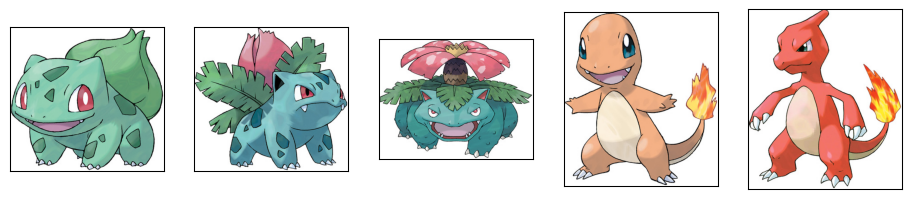

# 7. `Selenium` : mimer le comportement d’un utilisateur internet

Until now,
we have assumed that we always know the URL we are interested in.
Additionally, the pages we visit are **“static”**,
they do not depend on any action or search by the user.

We will now see how to fill in fields on a website and retrieve the information we are interested in.
The reaction of a website to a user’s action often involves the use of `JavaScript` in the world of web development.
The [Selenium](https://pypi.python.org/pypi/selenium) package allows
you to automate the behavior of a manual user from within your code.
It enables you to obtain information from a site that is not in the
`HTML` code but only appears after
the execution of `JavaScript` scripts in the background.

`Selenium` behaves like a regular internet user:
it clicks on links, fills out forms, etc.

## 7.1 First Example: Scraping a Search Engine

In this example, we will try to go to the
[Bing News](https://www.bing.com/news) site
and enter a given topic in the search bar.
To test, we will search with the keyword **“Trump”**.

Installing `Selenium` requires `Chromium`, which is a
minimalist version of the Google Chrome browser.
The version of [chromedriver](https://sites.google.com/a/chromium.org/chromedriver/)
must be `>= 2.36` and depends on the version of `Chrome` you have on your working environment.
To install this minimalist version of `Chrome` on a
`Linux` environment, you can refer to the dedicated section.

<div class="alert alert-danger" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-triangle-exclamation"></i> Installation de Selenium</h3>

On `Colab`, you can use the following commands:

``` python
!sudo apt-get update
!sudo apt install -y unzip xvfb libxi6 libgconf-2-4 -y
!sudo apt install chromium-chromedriver -y
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
```

<br>

If you are on the `SSP Cloud`, you can
run the following commands:

``` python
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb -O /tmp/chrome.deb
!sudo apt-get update
!sudo -E apt-get install -y /tmp/chrome.deb
!pip install chromedriver-autoinstaller selenium

import chromedriver_autoinstaller
chromedriver_autoinstaller.install()
```

<br>

You can then install `Selenium`.
For example, from a
`Notebook` cell:

</div>

After installing `Chromium`,
you need to tell `Python` where to find it. If you are on `Linux` and have followed the previous instructions, you can do the following:

In [45]:
import selenium
from webdriver_manager.chrome import ChromeDriverManager

path_to_web_driver = ChromeDriverManager().install()


First, you need to initialize the behavior
of `Selenium` by replicating the browser settings. To do this, we will first initialize our browser with a few options:

In [46]:
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
# chrome_options.add_argument('--verbose')


Then we launch the browser:

In [47]:
from selenium.webdriver.chrome.service import Service

service = Service(executable_path=path_to_web_driver)

browser = webdriver.Chrome(service=service, options=chrome_options)


We go to the `Bing News` site,
and we specify the keyword we want to search for.
In this case, we’re interested in news about Donald Trump.
After inspecting the page using the browser’s developer tools,
we see that the search bar is an element in the code called `q` (as in *query*).
So we’ll ask `selenium` to search for this element:

In [48]:
browser.get("https://www.bing.com/news")

search = browser.find_element("name", "q")
print(search)
print([search.text, search.tag_name, search.id])

# on envoie à cet endroit le mot qu'on aurait tapé dans la barre de recherche
search.send_keys("Trump")

search_button = browser.find_element("xpath", "//input[@id='sb_form_go']")
search_button.click()


`Selenium` allows you to capture the image you would see in the browser
with `get_screenshot_as_png`. This can be useful to check if you
have performed the correct action:

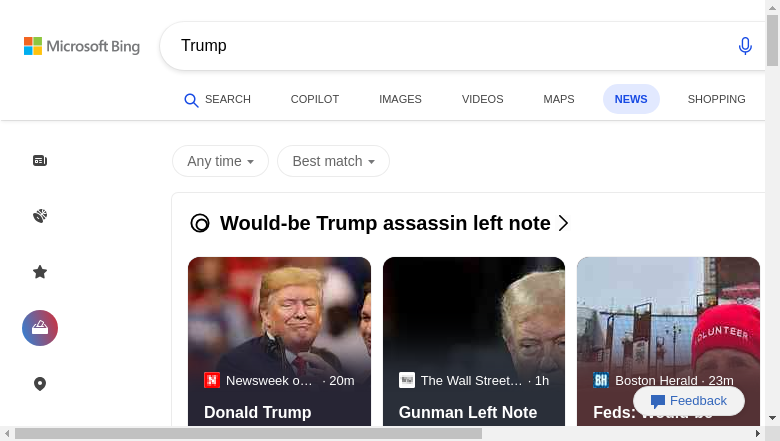

Finally, we can extract the results. Several
methods are available. The most
convenient method, when available,
is to use `XPath`, which is an unambiguous path
to access an element. Indeed,
multiple elements can share the same class or
the same attribute, which can cause such a search
to return multiple matches.
To determine the `XPath` of an object, the developer tools
of your web browser are handy.
For example, in `Firefox`, once you
have found an element in the inspector, you
can right-click \> Copy \> XPath.

Finally, to end our session, we ask `Python` to close the browser:

In [52]:
browser.quit()


We get the following results:

['https://www.msn.com/en-us/news/other/trump-to-rally-next-month-in-pennsylvania-city-where-his-first-assassination-attempt-occurred/ar-AA1r4Bdt?ocid=BingNewsVerp', 'https://www.foxnews.com/politics/former-ag-barr-dumbfounded-dojs-decision-release-letter-trump-would-be-assassin', 'https://www.nj.com/politics/2024/09/guy-who-knows-jd-vance-better-than-most-predicts-electoral-landslide-but-for-harris-or-trump.html', 'https://www.msn.com/en-us/news/other/iran-trump-and-the-third-assassination-plot/ar-AA1r49Bq?ocid=BingNewsVerp', 'https://www.foxnews.com/politics/trumps-ground-game-shrinks-voter-registration-gap-key-battlegrounds', 'https://apnews.com/article/trump-assassination-attempt-florida-fbi-justice-department-1295144a65f46059ce39b4ccd7288fbc', 'https://time.com/7023722/ryan-routh-trump-assassination-attempt-note/', 'https://www.nj.com/opinion/2024/09/trumps-brand-heads-into-the-discount-bin-letters.html']

Other useful `Selenium` methods:

| Method                                 | Result                                                                                                             |
|-------------------------------------------------|-----------------------|
| `find_element(****).click()`           | Once you have found a reactive element, such as a button, you can click on it to navigate to a new page            |
| `find_element(****).send_keys("toto")` | Once you have found an element, such as a field to enter credentials, you can send a value, in this case *“toto”*. |

## 7.2 Additional Exercise

To explore another application of web scraping, you can also tackle topic 5 of the 2023 edition of a non-competitive hackathon organized by Insee:

-   On [`Github`](https://github.com/InseeFrLab/funathon2023_sujet5)
-   On [`SSPCloud`](https://www.sspcloud.fr/formation?search=funat&path=%5B%22Funathon%202023%22%5D)

The NLP section of the course may be useful for the second part of the topic!